# 1. Imports

In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import mlflow

from mlops.orchestrators.pipeline import Pipeline
from mlops.orchestrators.datatype import MLFlowInfo
from mlops.orchestrators.local.local_dag_runner import LocalDagRunner
from mlops.config import Config as conf

# 2. Load Configuration
Configure training pipeline through configuration file quickly and easily

In [5]:
conf.load(config_from = "config.yaml")

Loading configuration from:  config.yaml
Loading configuration from:  /app/framework/config_files/local.yaml
Loading config restriction from:  /app/framework/config_files/dev_restricted.yaml
Utils.load_yaml_file(): File not found - /app/framework/config_files/dev_restricted.yaml


configuration(name='IRIS Training Pipeline', uri='https://github.com/colingwuyu/mlops.git', version='80a9ed5a0634fdab366262118aceaba8cc67576d', components=configuration(data_gen=configuration(pipeline_init=True, module='examples.iris.data_gen', args=configuration(url='http://iris_serving:3000/data', x_headers=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'], y_header='species', test_size=0.2)), data_validation=configuration(module='examples.iris.data_validation', upstreams=['data_gen']), feature_transform=configuration(module='examples.iris.feature_transform', args=configuration(transform_approach='min-max'), upstreams=['data_gen']), logistic_regression=configuration(module='examples.iris.logistic_regression', upstreams=['data_gen', 'data_validation', 'feature_transform']), linear_discriminant_analysis=configuration(module='examples.iris.linear_discriminant_analysis', upstreams=['data_gen', 'data_validation', 'feature_transform']), mlp_multiclassifier=configuration(module

# 3. Execute Training Pipeline
Use a local orchestrator to execute training pipeline

In [6]:
pipeline = Pipeline.load(conf.settings)

2021/09/09 20:38:22 INFO mlflow.projects.utils: === Fetching project from https://github.com/colingwuyu/mlops.git into /tmp/tmpea1o86k3 ===



Running operation data_gen...

Execution of operator data_gen took 0.09794020652770996 seconds

Running operation data_validation...

Execution of operator data_validation took 3.8968238830566406 seconds

Running operation feature_transform...

Execution of operator feature_transform took 0.08666563034057617 seconds

Running operation logistic_regression...

Execution of operator logistic_regression took 0.29916977882385254 seconds

Running operation linear_discriminant_analysis...

Execution of operator linear_discriminant_analysis took 0.301166296005249 seconds

Running operation mlp_multiclassifier...
| Epoch: 100/100 | Train Loss: 0.031470 | Train Accuracy: 0.988554 | Val Loss: 0.019145  | Val Accuracy: 0.990361 |
Execution of operator mlp_multiclassifier took 18.05826234817505 seconds

Running operation model_eval...

Execution of operator model_eval took 1.0266258716583252 seconds


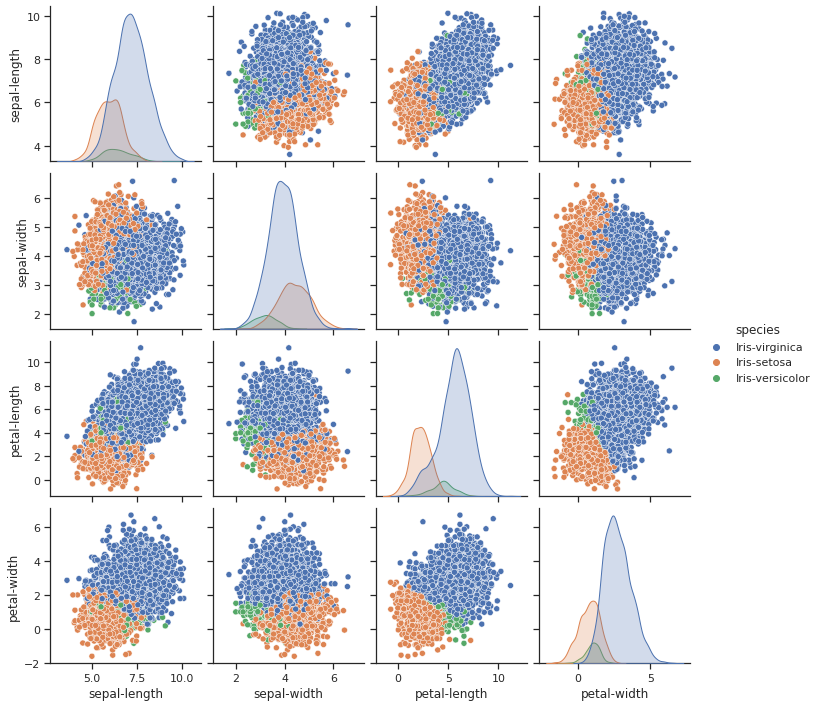

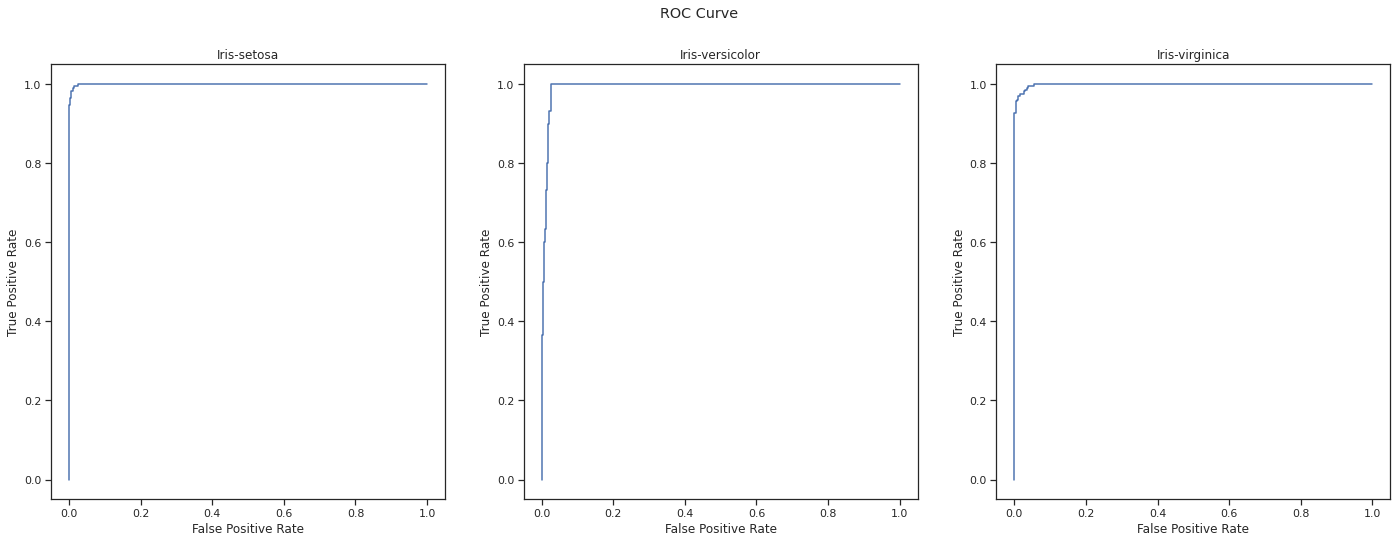

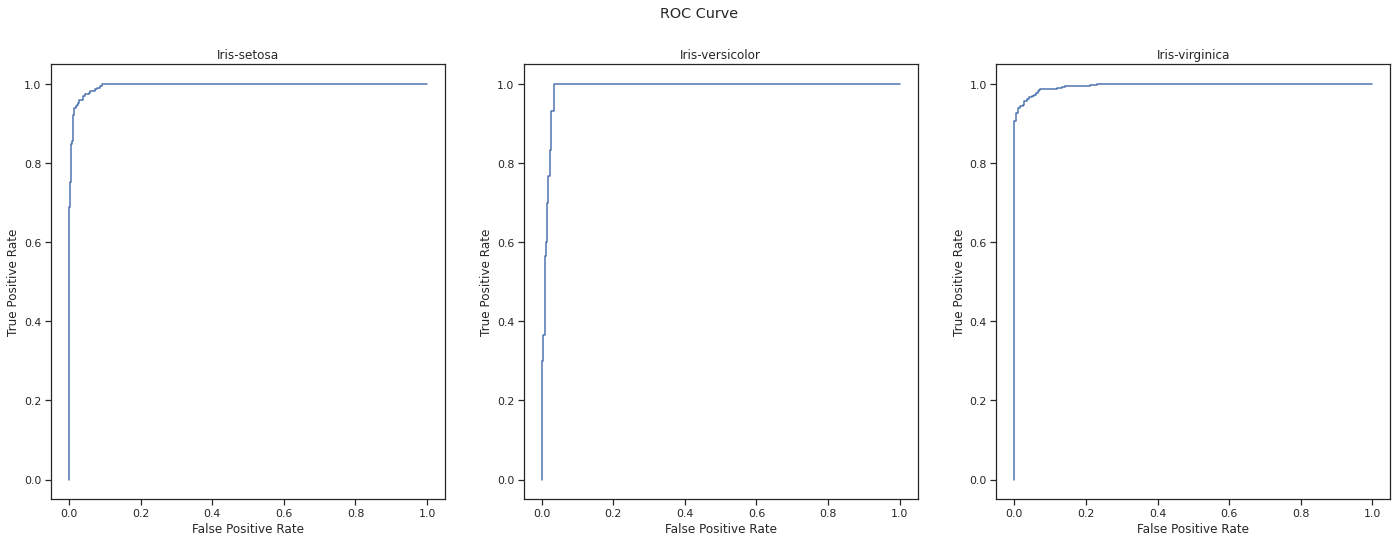

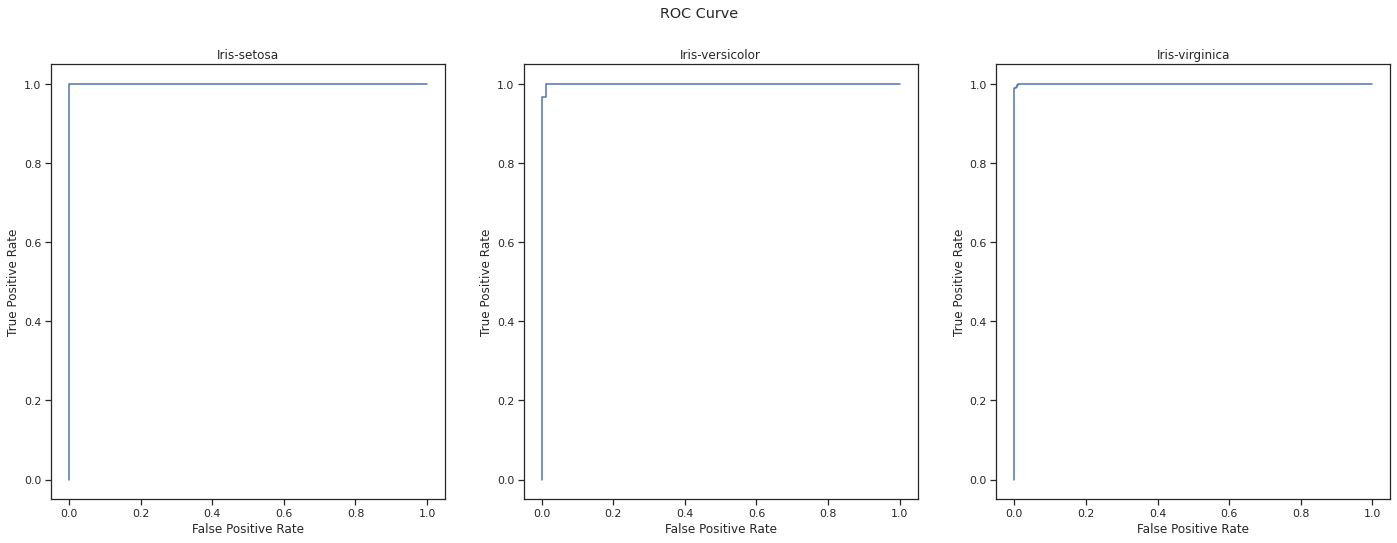

In [7]:
LocalDagRunner().run(pipeline)

# 4. Inspect Executed Pipeline
Completed training pipeline information is stored in `pipeline` object, and available to retrieve detailed information

By taking `run_id`s in the pipeline, we are able to view the Mlflow tracking results through its UI (http://mlflow_server:5000)  

In [5]:
pipeline

Pipeline(
	name: IRIS Training Pipeline
	run_id: 0d5a95dff3624781b1e0f7ca1c741ea2
	operators:
	(
		data_gen :
			ComponentSpec(
				name: data_gen
				module_file: /tmp/tmpf0028vc0/examples/iris/data_gen/__init__.py
				run_id: 95e5e13717ef4c7389a3b69fd20897a0
				args:
				{
				  "url": "http://iris_serving:3000/data",
				  "x_headers": [
				    "sepal-length",
				    "sepal-width",
				    "petal-length",
				    "petal-width"
				  ],
				  "y_header": "species",
				  "test_size": 0.2
				}
				upstreams: []
			)
		data_validation :
			ComponentSpec(
				name: data_validation
				module_file: /tmp/tmpf0028vc0/examples/iris/data_validation/__init__.py
				run_id: 96abd9cd7cfb46f880144d1dbdcbf8f5
				args:
				{}
				upstreams: ['data_gen']
			)
		feature_transform :
			ComponentSpec(
				name: feature_transform
				module_file: /tmp/tmpf0028vc0/examples/iris/feature_transform/__init__.py
				run_id: 2432cd2f04b4437fbdcf901be8720b58
				args:
				{
				  "transform_approach": "mi

We can also share the pipeline run_id to the other ppl. And the pipeline can be loaded through `Pipeline.view` function  

In [4]:
pipeline = Pipeline.view(
    MLFlowInfo(
        mlflow_tracking_uri = "http://mlflow_server:5000",
        mlflow_registry_uri = "http://mlflow_server:5000",
        mlflow_exp_id = "Sandbox",
        mlflow_run_id = "daa6c9b40c634890994fcda4c510dc95"
    )
)
pipeline

2021/09/01 22:44:36 INFO mlflow.projects.utils: === Fetching project from https://github.com/colingwuyu/mlops.git into /tmp/tmpg3acjtnz ===


Pipeline(
	name: IRIS Training Pipeline
	run_id: daa6c9b40c634890994fcda4c510dc95
	operators:
	(
		data_gen :
			ComponentSpec(
				name: data_gen
				module_file: examples/iris/data_gen/__init__.py
				run_id: 620923579f8345c1871aba003dab3b14
				args:
				{
				  "test_size": 0.2,
				  "url": "http://iris_serving:3000/data",
				  "x_headers": [
				    "sepal-length",
				    "sepal-width",
				    "petal-length",
				    "petal-width"
				  ],
				  "y_header": "species"
				}
				upstreams: []
			)
		data_validation :
			ComponentSpec(
				name: data_validation
				module_file: examples/iris/data_validation/__init__.py
				run_id: 89021cfab6d34bfb8ff00b8b8d567a97
				args:
				{}
				upstreams: ['data_gen']
			)
		feature_transform :
			ComponentSpec(
				name: feature_transform
				module_file: examples/iris/feature_transform/__init__.py
				run_id: 8b6d3b6540ce41d4b77aa079f0eb0ced
				args:
				{
				  "transform_approach": "min-max"
				}
				upstreams: ['data_gen']
			)
		lin

# 5. Review Training Components

We are able to review the training components by the helper functions.
Let's review the pipeline results backward starting from model evaluation

## 5.1 Model Evaluation

In [6]:
model_eval_run_id = pipeline.operators['model_eval'].run_id
pipeline.operators['model_eval']

ComponentSpec(
	name: model_eval
	module_file: /tmp/tmpf0028vc0/examples/iris/model_eval/__init__.py
	run_id: f762c933c75c4314bf222e2ad02a5d51
	args:
	{}
	upstreams: ['data_gen', 'logistic_regression', 'linear_discriminant_analysis', 'mlp_multiclassifier']
)

In [7]:
from examples.iris.model_eval import helper as me_helper

In [8]:
print("Selected model: %s \n" % me_helper.get_selected_model_name(model_eval_run_id))
print("Model selected based on metric: \n%s " % me_helper.get_model_metric_name(model_eval_run_id))
print("Selected model's metric value: %s " % me_helper.get_selected_model_metric_value(model_eval_run_id))

Selected model: mlp_multiclassifier 

Model selected based on metric: 
score_name: "classification_report"
report_column: "f1-score"
report_row: "macro avg"
threshold: 0.8500000238418579
 
Selected model's metric value: 1.0 


### 5.1.1 Model Performance Reports

In [10]:
me_helper.display_performance_eval_report(run_id=model_eval_run_id, model_name="logistic_regression")

In [11]:
me_helper.display_performance_eval_report(run_id=model_eval_run_id, model_name="linear_discriminant_analysis")

In [12]:
me_helper.display_performance_eval_report(run_id=model_eval_run_id, model_name="mlp_multiclassifier")

## 5.2 Trained Model

In [13]:
input_data = pd.DataFrame(data=[[5.1,3.5,1.4,0.2]], 
                          columns=["sepal-length","sepal-width","petal-length","petal-width"])

In [14]:
from examples.iris.logistic_regression import helper as lr_helper

lr_run_id = pipeline.operators['logistic_regression'].run_id
pipeline.operators['logistic_regression']

lr_model = lr_helper.load_model(lr_run_id)

lr_model.predict(input_data)

{'probabilities': array([[0.87967225, 0.11280292, 0.00752483]]),
 'classes': array(['Iris-setosa'], dtype=object),
 'class_ids': array([0]),
 'class_one_hot_ids': array([[1., 0., 0.]]),
 'all_class_ids': array([{'class_ids': 0, 'class_one_hot_ids': array([1., 0., 0.])},
        {'class_ids': 1, 'class_one_hot_ids': array([0., 1., 0.])},
        {'class_ids': 2, 'class_one_hot_ids': array([0., 0., 1.])}],
       dtype=object),
 'all_classes': array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15'),
 'all_classes_mapping': OrderedDict([('Iris-setosa',
               {'class_ids': 0, 'class_one_hot_ids': array([1., 0., 0.])}),
              ('Iris-versicolor',
               {'class_ids': 1, 'class_one_hot_ids': array([0., 1., 0.])}),
              ('Iris-virginica',
               {'class_ids': 2, 'class_one_hot_ids': array([0., 0., 1.])})]),
 'Anomaly': {'index': [],
  'columns': ['Anomaly short description', 'Anomaly long description'],
  'data': []}}

In [15]:
mlp_run_id = pipeline.operators['mlp_multiclassifier'].run_id
pipeline.operators['mlp_multiclassifier']

from examples.iris.mlp_multiclassifier import helper as mlp_helper

mlp_model = mlp_helper.load_model(mlp_run_id)

mlp_model.predict(input_data)

{'probabilities': array([[0.9935197 , 0.00425646, 0.00222383]], dtype=float32),
 'classes': array(['Iris-setosa'], dtype=object),
 'class_ids': array([0]),
 'class_one_hot_ids': array([[1., 0., 0.]]),
 'all_class_ids': array([{'class_ids': 0, 'class_one_hot_ids': array([1., 0., 0.])},
        {'class_ids': 1, 'class_one_hot_ids': array([0., 1., 0.])},
        {'class_ids': 2, 'class_one_hot_ids': array([0., 0., 1.])}],
       dtype=object),
 'all_classes': array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15'),
 'all_classes_mapping': OrderedDict([('Iris-setosa',
               {'class_ids': 0, 'class_one_hot_ids': array([1., 0., 0.])}),
              ('Iris-versicolor',
               {'class_ids': 1, 'class_one_hot_ids': array([0., 1., 0.])}),
              ('Iris-virginica',
               {'class_ids': 2, 'class_one_hot_ids': array([0., 0., 1.])})]),
 'Anomaly': {'index': [],
  'columns': ['Anomaly short description', 'Anomaly long description'],
  'data': []}}

In [16]:
mlp_helper.download_tb(mlp_run_id)

'./tb_logs/run_4a7029468cf04089ad914bfb1cbd8db6'

In [17]:
%load_ext tensorboard
%tensorboard --logdir tb_logs --bind_all

## 5.3 Data Validation

In [18]:
data_val_run_id = pipeline.operators['data_validation'].run_id
pipeline.operators['data_validation']

ComponentSpec(
	name: data_validation
	module_file: /tmp/tmpf0028vc0/examples/iris/data_validation/__init__.py
	run_id: 96abd9cd7cfb46f880144d1dbdcbf8f5
	args:
	{}
	upstreams: ['data_gen']
)

In [19]:
from examples.iris.data_validation import helper as dv_helper

In [20]:
dv_helper.display_schema(data_val_run_id)

,Type,Presence,Valency,Domain
Feature name,,,,
'sepal-length',FLOAT,required,,-
'sepal-width',FLOAT,required,,-
'petal-length',FLOAT,required,,-
'petal-width',FLOAT,required,,-
'species',STRING,required,,'species'


,Values
Domain,
'species',"'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'"


In [21]:
dv_helper.display_trainset_stat(data_val_run_id)

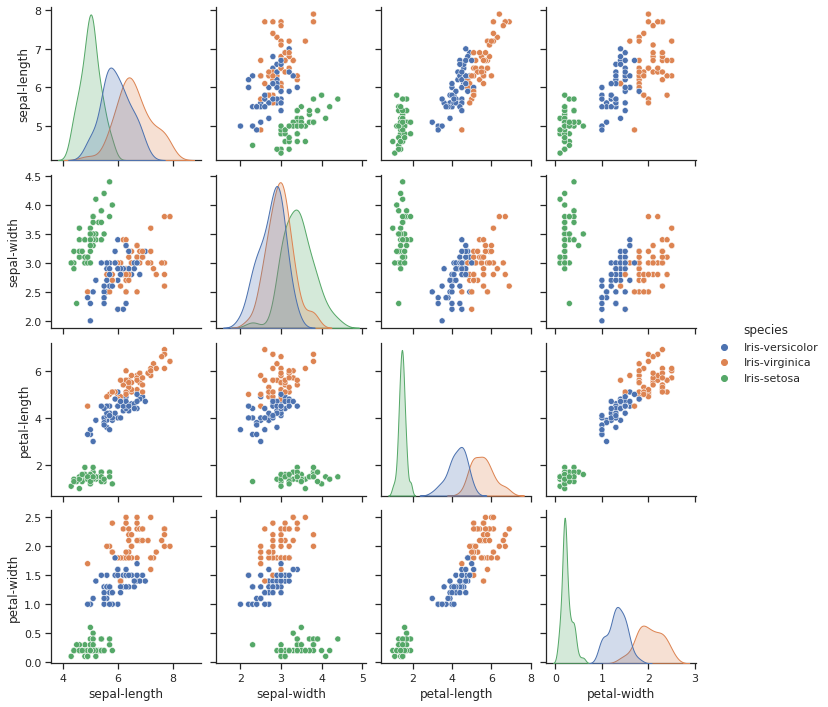

In [22]:
dv_helper.display_scatter_plot(data_val_run_id)

## 5.4 Data Generation

In [23]:
data_gen_run_id = pipeline.operators['data_gen'].run_id
pipeline.operators['data_gen']

ComponentSpec(
	name: data_gen
	module_file: /tmp/tmpf0028vc0/examples/iris/data_gen/__init__.py
	run_id: 95e5e13717ef4c7389a3b69fd20897a0
	args:
	{
	  "url": "http://iris_serving:3000/data",
	  "x_headers": [
	    "sepal-length",
	    "sepal-width",
	    "petal-length",
	    "petal-width"
	  ],
	  "y_header": "species",
	  "test_size": 0.2
	}
	upstreams: []
)

In [24]:
from examples.iris.data_gen import helper as dg_helper

In [25]:
print("Load training data features")
train_data_x = dg_helper.load_train_X(data_gen_run_id)
train_data_x.head(5)

Load training data features


,sepal-length,sepal-width,petal-length,petal-width
0,6.1,3.0,4.6,1.4
1,7.7,3.0,6.1,2.3
2,5.6,2.5,3.9,1.1
3,6.4,2.8,5.6,2.1
4,5.8,2.8,5.1,2.4


In [26]:
print("Load training data labels")
train_data_y = dg_helper.load_train_y(data_gen_run_id)
train_data_y.head(5)

Load training data labels


,species
0,Iris-versicolor
1,Iris-virginica
2,Iris-versicolor
3,Iris-virginica
4,Iris-virginica


In [27]:
print("Load testing data features")
test_data_x = dg_helper.load_test_X(data_gen_run_id)
test_data_x.head(5)

Load testing data features


,sepal-length,sepal-width,petal-length,petal-width
0,5.8,4.0,1.2,0.2
1,5.1,2.5,3.0,1.1
2,6.6,3.0,4.4,1.4
3,5.4,3.9,1.3,0.4
4,7.9,3.8,6.4,2.0


In [28]:
print("Load testing data labels")
test_data_y = dg_helper.load_test_y(data_gen_run_id)
test_data_y.head(5)

Load testing data labels


,species
0,Iris-setosa
1,Iris-versicolor
2,Iris-versicolor
3,Iris-setosa
4,Iris-virginica


# 6 Continuation Experiment

We are able to reuse executed operations in the pipeline, make changes to configuration of other components and start a new experiment.

We will load 'config-ce.yaml' for the experiment, in which `data_validation` component is reused.


In [28]:
conf.load("config-ce.yaml")

Loading configuration from:  config-ce.yaml
Loading configuration from:  /app/framework/config_files/local.yaml
Loading config restriction from:  /app/framework/config_files/dev_restricted.yaml
Utils.load_yaml_file(): File not found - /app/framework/config_files/dev_restricted.yaml


configuration(name='IRIS Training Pipeline', uri='/app', components=configuration(data_gen=configuration(pipeline_init=True, module_file='examples/iris/data_gen/__init__.py', run_id='a9a65986bda0440a913688a5a0e84967', args=configuration(url='http://iris_serving:3000/data', x_headers=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'], y_header='species', test_size=0.2)), data_validation=configuration(module_file='examples/iris/data_validation/__init__.py', run_id='0119a6611d1a4c9b960cf09fa202357f', upstreams=['data_gen']), feature_transform=configuration(module_file='examples/iris/feature_transform/__init__.py', run_id='4925577022374674a4c8eff3b55cab02', args=configuration(transform_approach='min-max'), upstreams=['data_gen']), logistic_regression=configuration(module_file='examples/iris/logistic_regression/__init__.py', upstreams=['data_gen', 'data_validation', 'feature_transform']), linear_discriminant_analysis=configuration(module_file='examples/iris/linear_discriminant_a


Running operation data_gen...

Operation data_gen has been executed already...

Running operation data_validation...

Operation data_validation has been executed already...

Running operation feature_transform...

Operation feature_transform has been executed already...

Running operation logistic_regression...


2021/08/30 13:29:45 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc_scorewill not be recorded. Metric error: Encoders require their input to be uniformly strings or numbers. Got ['ndarray']



Execution of operator logistic_regression took 0.433605432510376 seconds

Running operation linear_discriminant_analysis...


2021/08/30 13:29:46 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc_scorewill not be recorded. Metric error: Encoders require their input to be uniformly strings or numbers. Got ['ndarray']



Execution of operator linear_discriminant_analysis took 0.45220136642456055 seconds

Running operation mlp_multiclassifier...
| Epoch: 100/100 | Train Loss: 0.047709 | Train Accuracy: 0.975000 | Val Loss: 0.025238  | Val Accuracy: 0.966667 |
Execution of operator mlp_multiclassifier took 14.06665301322937 seconds

Running operation model_eval...

Execution of operator model_eval took 0.9782395362854004 seconds


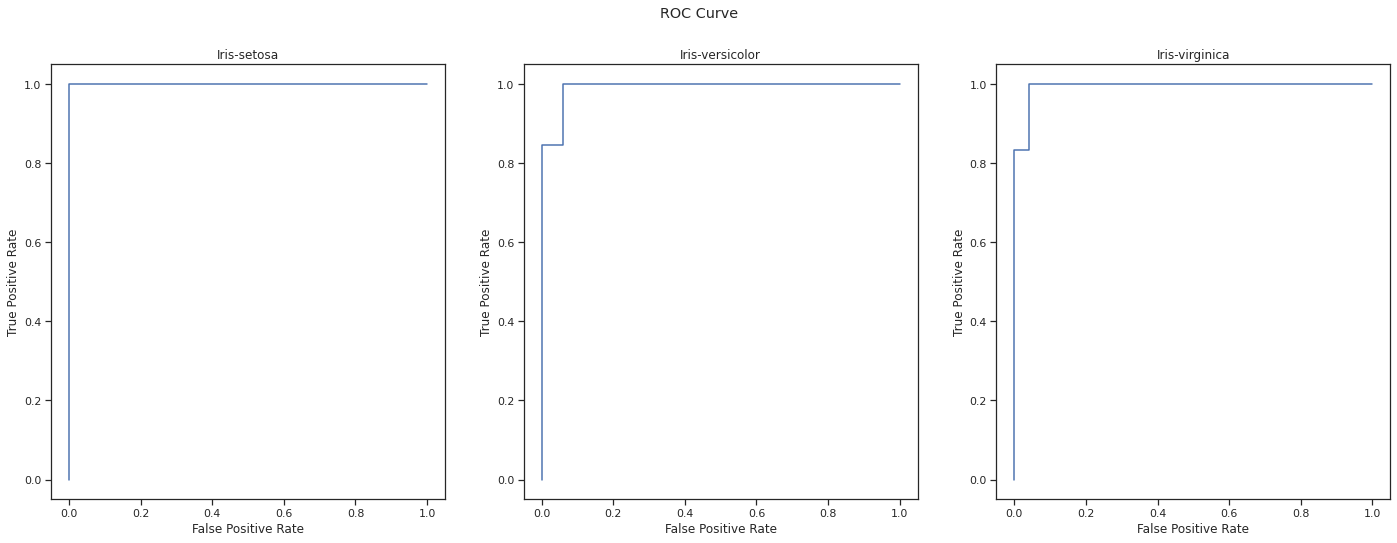

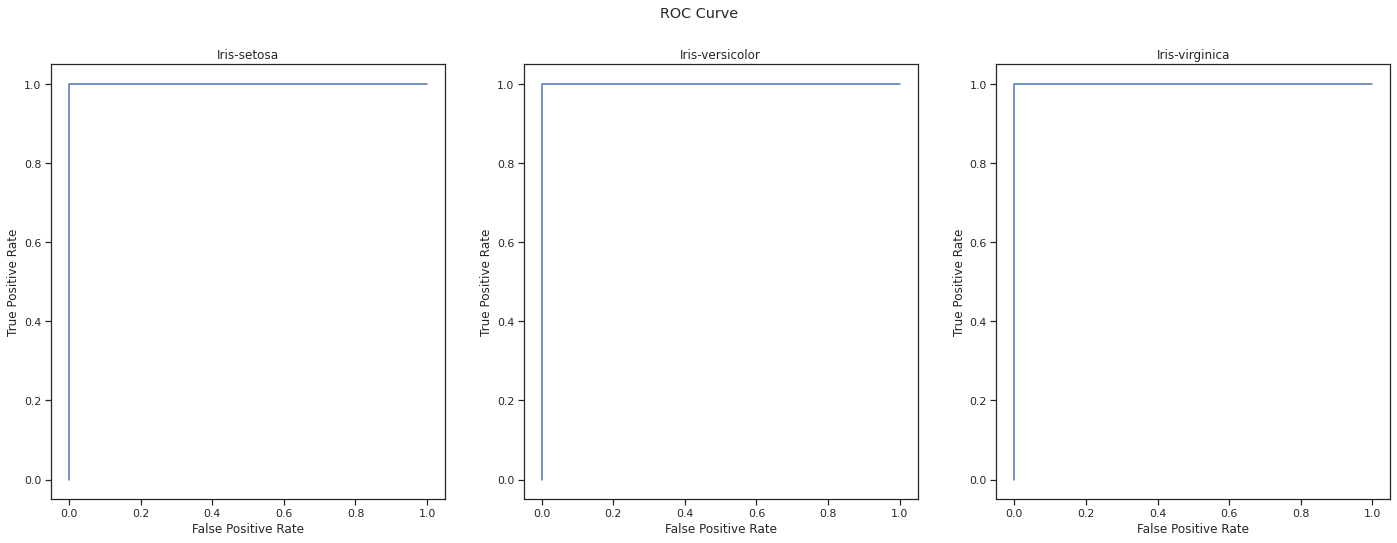

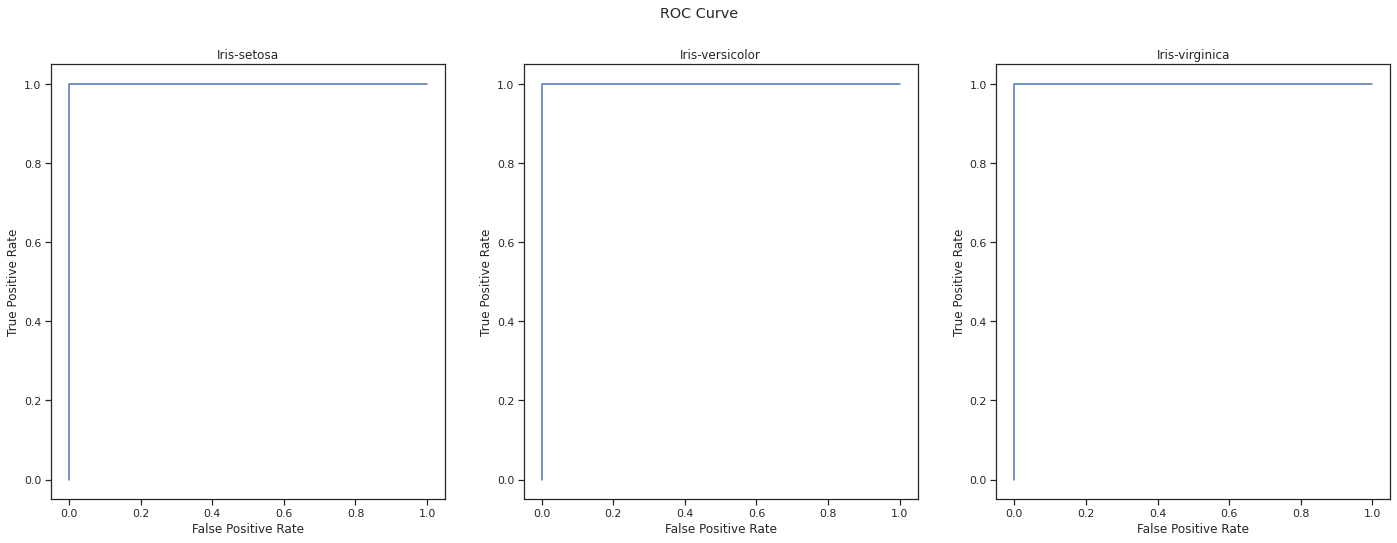

In [29]:
ce_pipeline = Pipeline.load(conf.settings)
LocalDagRunner().run(ce_pipeline)

In [30]:
ce_pipeline

Pipeline(
	name: IRIS Training Pipeline
	run_id: fa46adee14ff4668b02d2e34439f100c
	operators:
	(
		data_gen :
			ComponentSpec(
				name: data_gen
				module_file: /app/examples/iris/data_gen/__init__.py
				run_id: a9a65986bda0440a913688a5a0e84967
				args:
				{
				  "url": "http://iris_serving:3000/data",
				  "x_headers": [
				    "sepal-length",
				    "sepal-width",
				    "petal-length",
				    "petal-width"
				  ],
				  "y_header": "species",
				  "test_size": 0.2
				}
				upstreams: []
			)
		data_validation :
			ComponentSpec(
				name: data_validation
				module_file: /app/examples/iris/data_validation/__init__.py
				run_id: 0119a6611d1a4c9b960cf09fa202357f
				args:
				{}
				upstreams: ['data_gen']
			)
		feature_transform :
			ComponentSpec(
				name: feature_transform
				module_file: /app/examples/iris/feature_transform/__init__.py
				run_id: 4925577022374674a4c8eff3b55cab02
				args:
				{
				  "transform_approach": "min-max"
				}
				upstreams: ['data_g

## 6.1 Check New Experiment Result


In [31]:
ce_model_eval_run_id = ce_pipeline.operators['model_eval'].run_id
ce_pipeline.operators['model_eval']

ComponentSpec(
	name: model_eval
	module_file: /app/examples/iris/model_eval/__init__.py
	run_id: bf661b569ef54510a249fb0f083b0d43
	args:
	{}
	upstreams: ['data_gen', 'logistic_regression', 'linear_discriminant_analysis', 'mlp_multiclassifier']
)

In [32]:
me_helper.display_performance_eval_report(run_id=ce_model_eval_run_id, model_name="logistic_regression")

In [33]:
me_helper.display_performance_eval_report(run_id=ce_model_eval_run_id, model_name="mlp_multiclassifier")